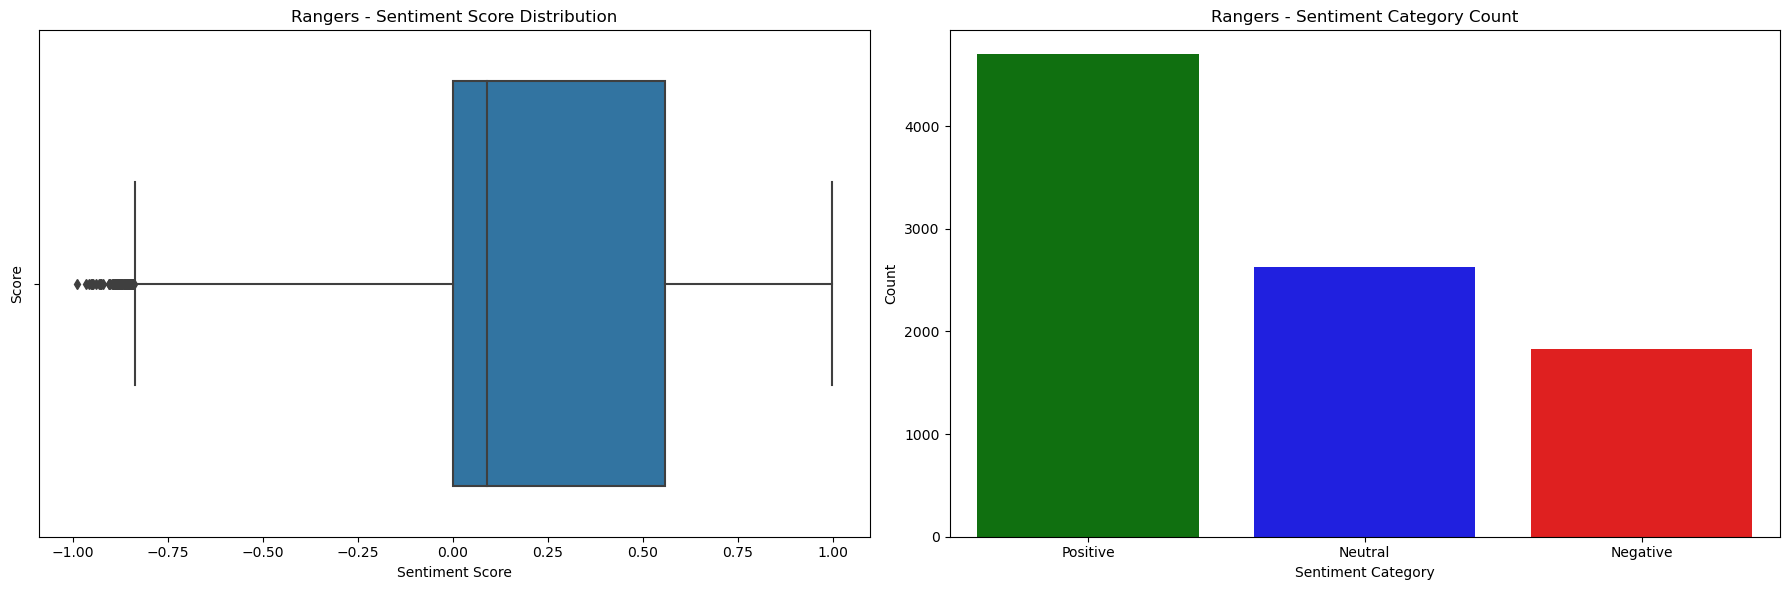

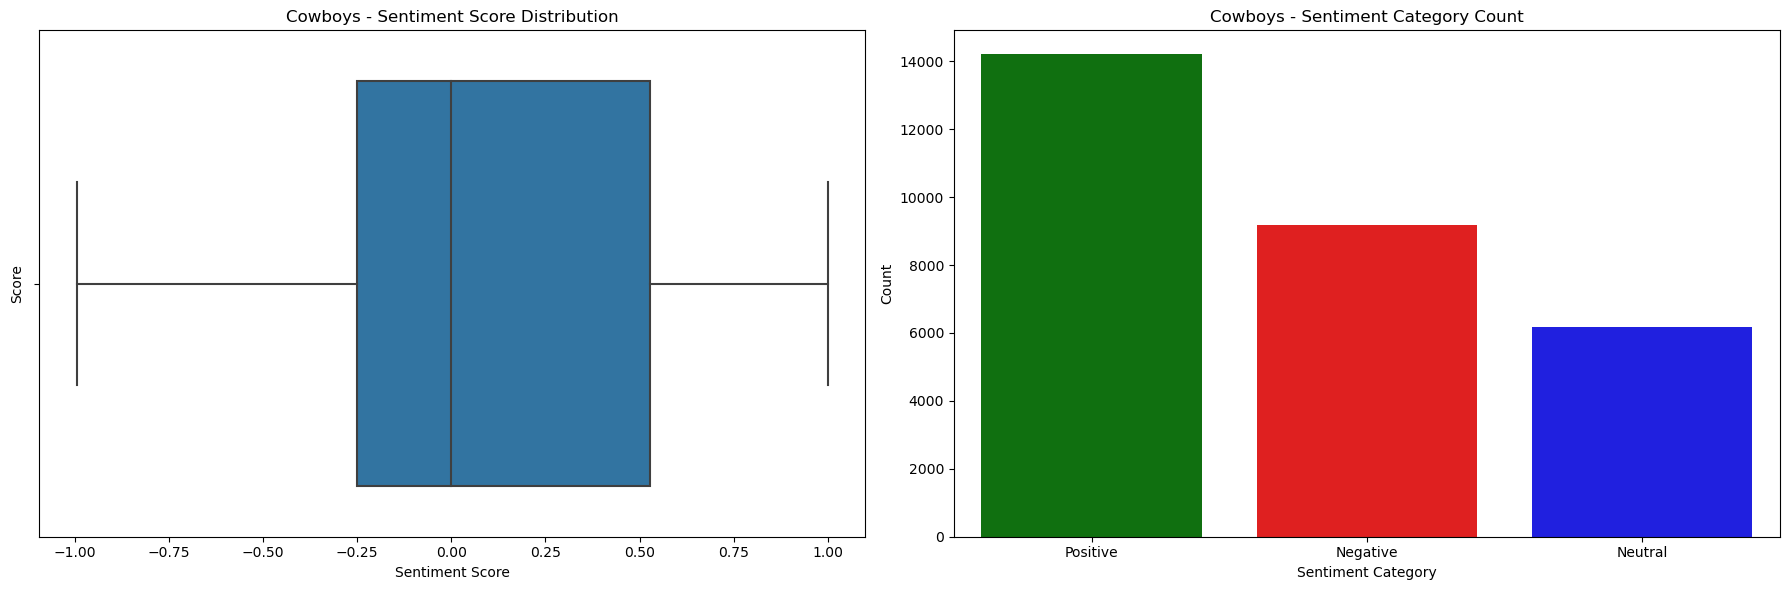

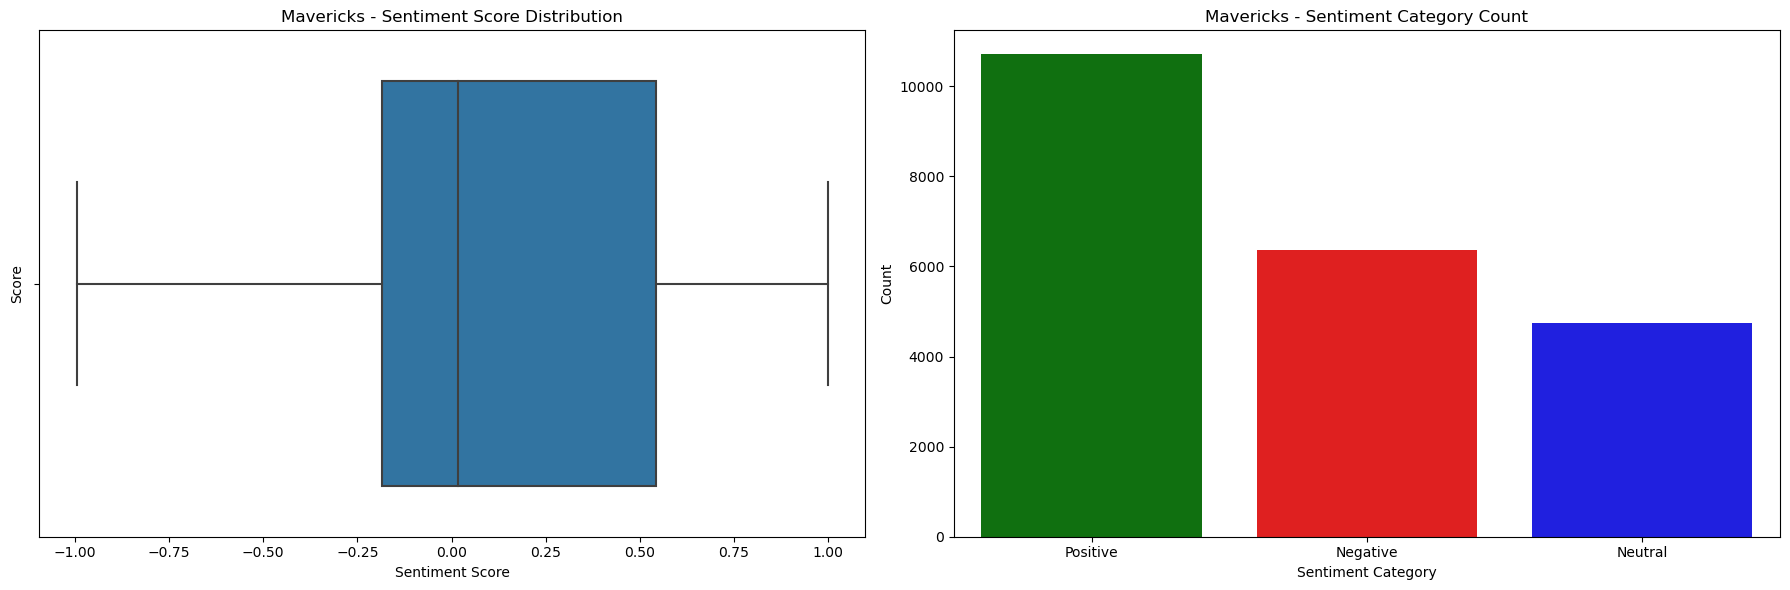

In [127]:
# NTLK VADER Sentiment Scores and Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment analysis 
def sa_plot(df_name, team_name):
    # Create figure with 2 subplots
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))

    # Box plot of sentiment scores
    sns.boxplot(x='sentiment_score', 
                data=df_name, 
                ax=ax[0])
    ax[0].set_title(f'{team_name} - Sentiment Score Distribution')
    ax[0].set_xlabel('Sentiment Score')
    ax[0].set_ylabel('Score')

    # Colors for sentiment categories
    category_colors = {"Positive": "green", "Neutral": "blue", "Negative": "red"}

    # Count plot of sentiment categories with custom colors
    sns.countplot(x='sentiment_category', 
                  data=df_name, 
                  ax=ax[1], 
                  order=df_name['sentiment_category'].value_counts().index,
                  palette=category_colors)
    ax[1].set_title(f'{team_name} - Sentiment Category Count')
    ax[1].set_xlabel('Sentiment Category')
    ax[1].set_ylabel('Count')

    # Tighten layout
    plt.tight_layout()
    plt.show()

# Load csv files
rangers_df = pd.read_csv('rangers_scores.csv')
cowboys_df = pd.read_csv('cowboys_scores.csv')
mavericks_df = pd.read_csv('mavericks_scores.csv')

# Plot sentiment analysis for each brand
sa_plot(rangers_df, 'Rangers')
sa_plot(cowboys_df, 'Cowboys')
sa_plot(mavericks_df, 'Mavericks')

In [128]:
# Print top 5 Rangers comments
rangers_df_pos = rangers_df.sort_values(by='sentiment_score', ascending=False)

# Print the top 5 comments
top_5_comments = rangers_df_pos.head(20)['processed_comment']
top_5_comments

3534    thanks man really appreciate the love and the ...
5665    its the internet and were each just one of man...
5671    you know i sort of felt like this about green ...
5685    ive been a rangers fan since when i was at tha...
5662    ha i mean i feel you but think about it this w...
5692    before i had no team but i was a fan of the ga...
6439    i pulled this comment of mine from an rbasebal...
6943    unsure of how crazy ill sound but i dont think...
7118    its just a negotiation tactic im sure they can...
2295    my dad didnt like beltre when we first got him...
3648    interesting find is that incentives are very l...
9105    no to both but if i were to pick one i would p...
7588    i think signing monty to a deal similar to nol...
2099    oh yeah you got ta watch the integrity of thos...
3535    open season by harbour im so happy you asked i...
8924    we were flying to boston once for a trip and o...
3038    my first game was in or i was or my dads frien...
2135    man al

In [129]:
# Print bottom 5 Rangers comments
rangers_df_neg = rangers_df.sort_values(by='sentiment_score', ascending=True)

bottom_5_comments = rangers_df_neg.head(20)['processed_comment']
bottom_5_comments

7694    trying not to get too pedantic but your orgini...
7456    they are genuinely the worst and its a shame t...
1018    thank you ill be the first to say that bally s...
6767    i disagree everyone is acting like our positio...
7481    spot on problem is almost all sports retail sa...
5678    so depending on how old you are being a ranger...
484     and also had a historically bad save percentag...
2880    can diamondballys be hated any more fuck those...
1904    so the count is and i tell this fucking mother...
7924    agreed but the precedent is set and unless he ...
4754    little if theyve done anything for the rotatio...
8064    this is correct it will take more than what we...
7373    sorry dont mean to be contradictory but i just...
7472    i got multiple new era hats this post season a...
7297    i was going by this article which brings us to...
9000    i sat behind the dugout when the rangers went ...
6405    its truly surprising to me how many people jus...
2045    fuck e

In [130]:
# Print neutral Rangers comments
rangers_df_neu = rangers_df[rangers_df['sentiment_score'] == 0]

# Print the first 5 processed comments from the filtered DataFrame
print(rangers_df_neu['processed_comment'].head(20))

0                                   minutes of pure sex
1      minutesim not going to wa oh i remember that one
2                     those garcia hrs hit harder today
6     they had robbie cano in the lineup for an earl...
8                          he signed my hat in tampa in
11    i still wonder how it wouldve gone if we didnt...
13                             this guy doesnt baseball
18                maybe this means we can now get monty
19    does he still live with his parents in his mid...
21                        i think we all know this josh
23    the bally situation has been in the news he mi...
40    agents agents talk they know whats going on be...
42                           im so bricked up right now
43                             got ta do the radio call
51    so the arbitrationless streak is back on the menu
52                                                  lfg
53                              lee stevens in shambles
54                     gifgiphycdnsplvcuaqrynvdo

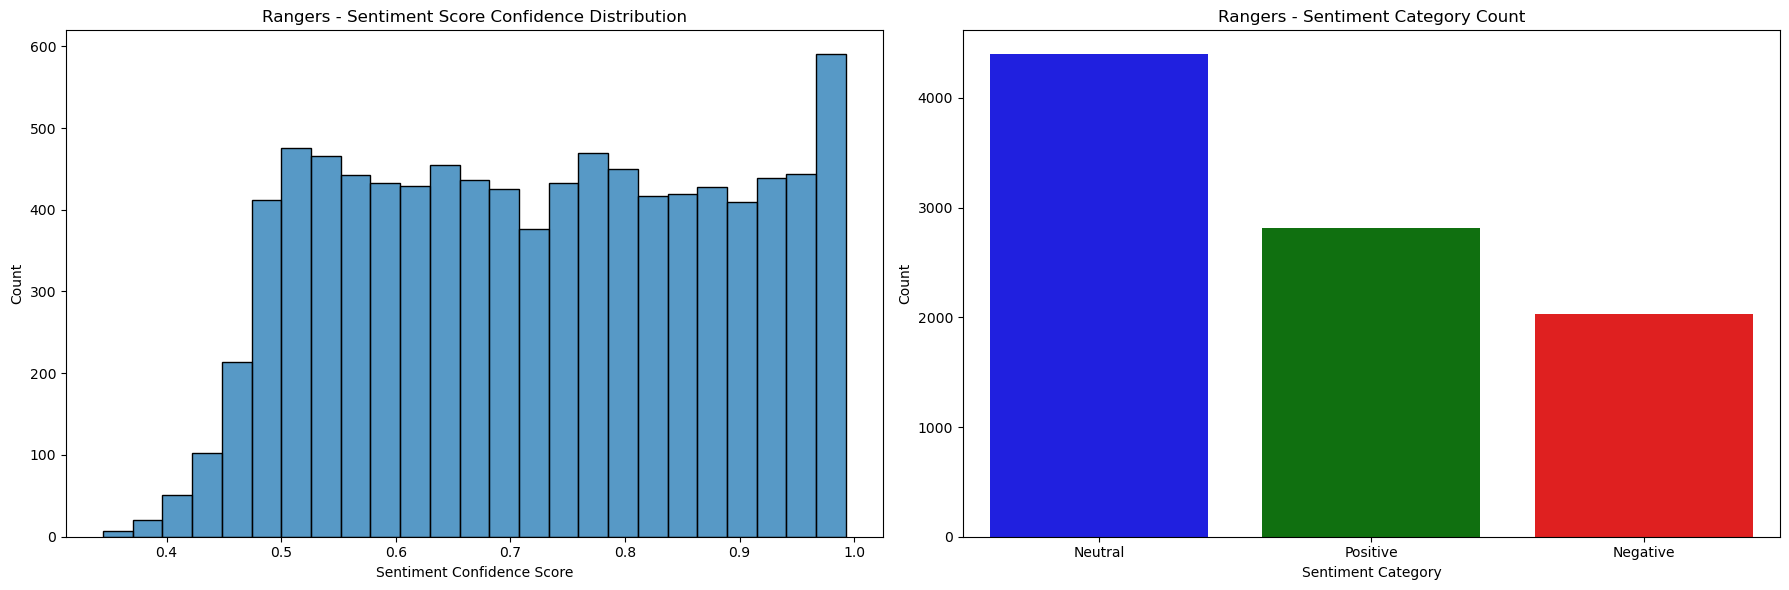

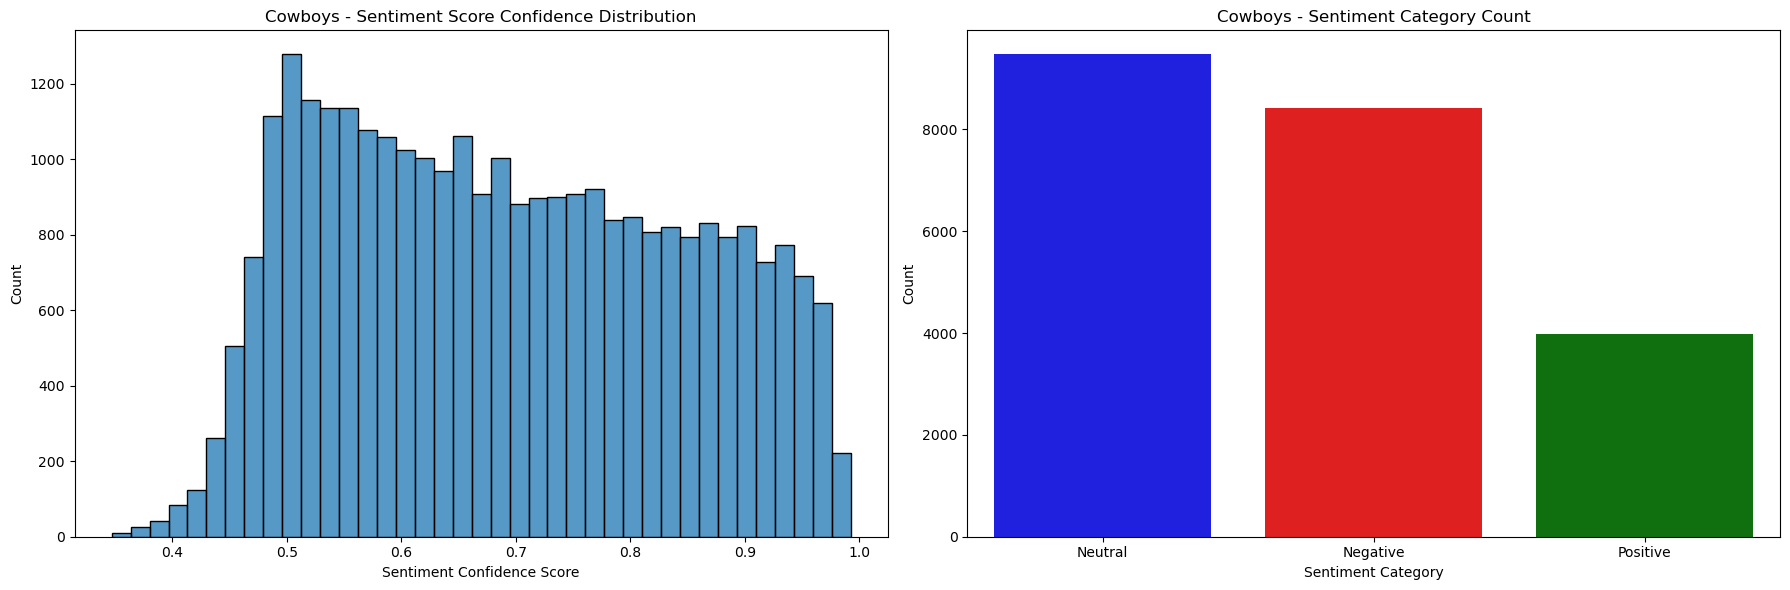

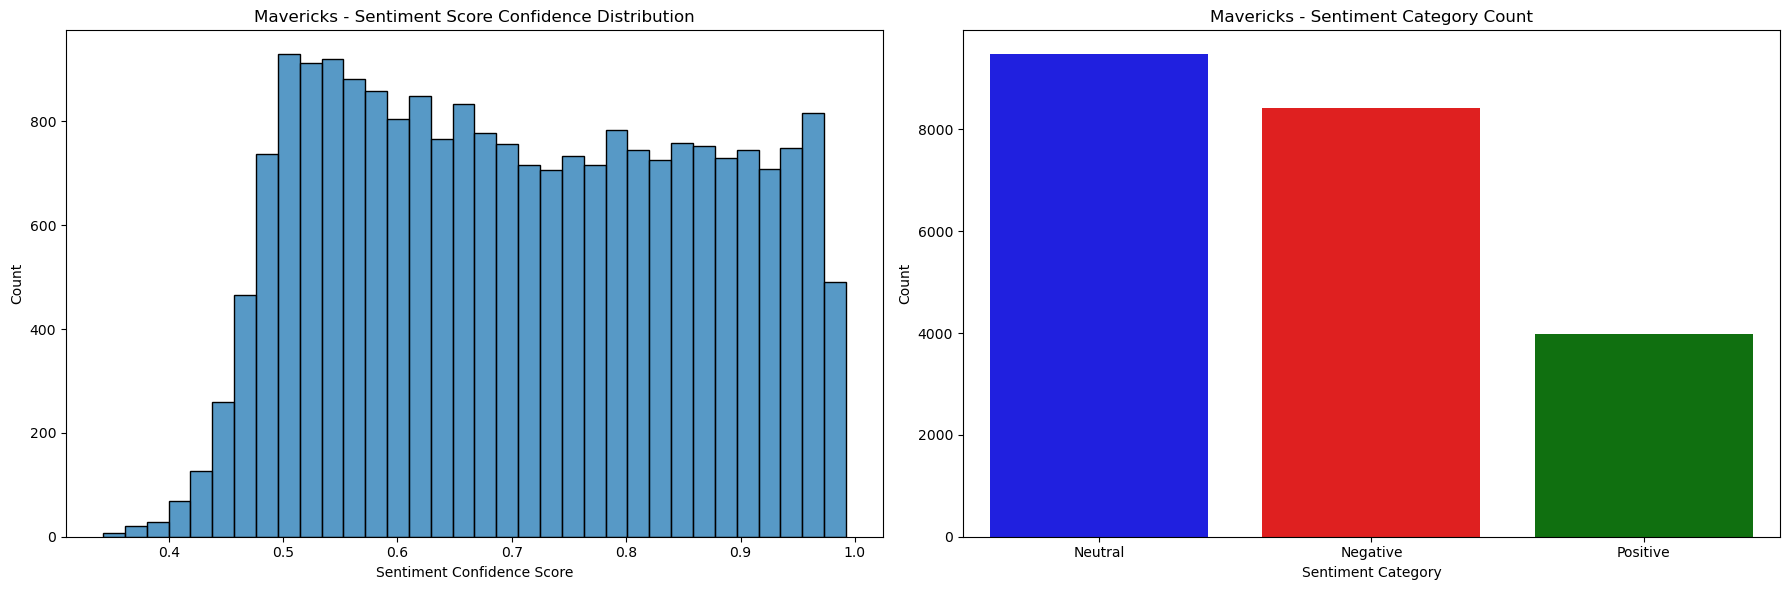

In [70]:
# BERT Sentiment Scores and Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment analysis 
def sa_plot(df_name, team_name):
    # Create figure with 2 subplots
    fig, ax = plt.subplots(1, 2, figsize=(18, 6))

    # Box plot of sentiment scores
    sns.histplot(x='score', 
                data=df_name, 
                ax=ax[0])
    ax[0].set_title(f'{team_name} - Sentiment Score Confidence Distribution')
    ax[0].set_xlabel('Sentiment Confidence Score')
    ax[0].set_ylabel('Count')

    # Colors for sentiment categories
    category_colors = {"Positive": "green", "Neutral": "blue", "Negative": "red"}

    # Count plot of sentiment categories with custom colors
    sns.countplot(x='sentiment', 
                  data=df_name, 
                  ax=ax[1], 
                  order=df_name['sentiment'].value_counts().index,
                  palette=category_colors)
    ax[1].set_title(f'{team_name} - Sentiment Category Count')
    ax[1].set_xlabel('Sentiment Category')
    ax[1].set_ylabel('Count')

    # Tighten layout
    plt.tight_layout()
    plt.show()

# Load csv files
rangers_df = pd.read_csv('bert_rangers_scores.csv')
cowboys_df = pd.read_csv('bert_cowboys_scores.csv')
mavericks_df = pd.read_csv('bert_mavericks_scores.csv')

rangers_df['sentiment'] = rangers_df['sentiment'].replace({'LABEL_0': 'Negative', 'LABEL_1': 'Neutral', 'LABEL_2': 'Positive'})
cowboys_df['sentiment'] = mavericks_df['sentiment'].replace({'LABEL_0': 'Negative', 'LABEL_1': 'Neutral', 'LABEL_2': 'Positive'})
mavericks_df['sentiment'] = mavericks_df['sentiment'].replace({'LABEL_0': 'Negative', 'LABEL_1': 'Neutral', 'LABEL_2': 'Positive'})

# Plot sentiment analysis for each brand
sa_plot(rangers_df, 'Rangers')
sa_plot(cowboys_df, 'Cowboys')
sa_plot(mavericks_df, 'Mavericks')

In [86]:
# Print 20 neutral Rangers comments for accuracy verification
neu_comments_df = rangers_df[rangers_df['sentiment'] == 'Neutral']
sample_neu_comments = neu_comments_df['comment_body'].sample(n=20, random_state=5)
print(sample_neu_comments)

3434                                       Olson? Really?
4205    If they can count Piazza for the Marlins then ...
7893    I could do that. Are there any good shops/show...
2148    I thought Huff is going to AAA with the signin...
4502                    What is this supposed to tell me?
7572    I've been trying to find a low profile red one...
9234             Big assumption for a 31 year old catcher
3698                                            [deleted]
6177    Favorite lewin call\n\n"Mike Napoli, and his b...
4771    I get the fact that the Dodgers have more Tale...
5100               Wait 3 innings? Or did you mean 3outs?
3710    Bro thanks for clarifying, only been watching ...
2963                          It’s hats all the way down.
6277                                               PLEASE
8863    Nolan Ryan, I work valet at a nice hotel in DF...
308     I believe you can get a free DMN digital subsc...
7626    The issue is value, not the TV deal. Ownership...
742           

In [69]:
# Print 20 negative Rangers comments for accuracy verification
rangers_df_neg = rangers_df.sort_values(by='sentiment', ascending=True)
neg_comments = rangers_df_neg.head(20)['comment_body']
neg_comments

6078    Dang! Just checked my email to see when I orde...
6571    **Accidentally pokes eye onto one of the flags.**
3566             Fr 😭😭\n\nOh my gosh it got so much worse
6568    Same feeling here. I wish we've been more proa...
3568                            Made my fuckin eyes water
7639    They can say whatever they want, but they're n...
6567    Sucks that everyone is just cool with getting ...
6566                   This is a stupid, nonsensical post
2397           Those won’t ship until May unfortunately. 
7643    No owner save one is going to spend their own ...
7644    I think you’re confusing billionaires with Scr...
7645    And he made his money by buying distressed ass...
6562    Not interested in any players the Royals have ...
6559    We shouldn’t be called out for wanting to be c...
5198                                    Why is that NSFW?
1418    So around the amount they are allegedly going ...
1416    I feel that , I’m not saying don’t do it , I j...
7649    It isn

In [80]:
# Filter the DataFrame for positive sentiments for acccuracy verification
positive_comments_df = rangers_df[rangers_df['sentiment'] == 'Positive']
sample_positive_comments = positive_comments_df['comment_body'].sample(n=20, random_state=1)
print(sample_positive_comments)

2565    This has aged so well.\n\n\n> "few opportuniti...
6336    Things keep getting better and better for the ...
6172       Thanks, man. I'm pretty happy with the design!
5539         I got that same one for Christmas today too!
7415    My money is on Martin Perez. He was very good ...
4103                                 Damn that is amazing
9181    The thing that makes me most confident about C...
2176    Probably just super fresh lines aren’t the bes...
7953    Numbers are really impressive. The only pause ...
1449           Dude that’s an awesome painting. Well done
114                           Gotcha, makes sense thanks.
168     Yeah, there are a few of these that I really l...
3874    I will always love Lance Lynn, simply because ...
3691                                                 Yes.
831     Have you seen the grey jerseys in person ? The...
5408    It is, I was being passive aggressive. Amazing...
5519    Oh I'd pay more. That's not bad.\n\nMy Hedges ...
3175    Bro we

In [121]:
# Print 20 positive Rangers comments for accuracy verification
pos_comments_df = cowboys_df[cowboys_df['sentiment'] == 'Positive']
sample_pos_comments = pos_comments_df['comment_body'].sample(n=20, random_state=30)
print(sample_pos_comments)

5382     Well the 3 high picks implies they will be shi...
5564     I have a gut feeling either Rivera or Mike Zim...
7192     Not a boys fan here.\n\nI think you have the s...
5503                  All Mike will do is hire his cronies
3914     When has Dallas ever paid an aging running bac...
17208                                        Tom Brady did
18936           I believe in dak! we go again next season!
7620                                     Self examination?
10811    Who gives a fuck about these stupid stats. You...
21659    And go back to 2016 when dak started. It’s bee...
9112                           Stefon diggs to the cowboys
5164     Speaking of Vikings DCs. If we don’t care abou...
15002    Rodgers after MM was fired has a couple MVPs, ...
8129     We can support the team but there’s a distinct...
6395        Ron Rivera would be the most likely in my mind
1090                             The answer is Jerry Jones
5159                                    Better than Rive

In [126]:
# Print 20 negative Rangers comments for accuracy verification
neg_comments_df = cowboys_df[cowboys_df['sentiment'] == 'Negative']
sample_neg_comments = neg_comments_df['comment_body'].sample(n=20, random_state=24)
print(sample_neg_comments)

9171                Again, Same Comment Different Year, 😞😞
7472                       I feel like this can’t be real.
13135    You’re not wrong. It’s a defense heavily depen...
7316     But in the end it always comes due like the sa...
16731    Oh I’m sure. Probably better to just become a ...
19246    It’s a risk you have to take no matter what. D...
18692    He will be if we extend him there guy. And Pol...
5599     Prioritizing linebacker play is irrelevant...i...
16267    Shh..Dont tell nobody working on something her...
13462    Mt. Rushmore of cowboys games :\n\n07 @buffalo...
18905    The issue is that Dak is a GOOD QB sometimes e...
8357     With the exception of the INTs that game Presc...
15845    It’s possible and I agree I stated before the ...
17239    I also believe he signed deals with the patrio...
438      Detroit still did not make it to the NFCC game...
16521    If you made 8 into a stuffed animal you’d make...
436      Wait, are you telling me the Cowboys haven’t m.

In [ ]:
'''
Conclusion:

On the day of 2/8/24, the Rangers re-signed one of their star players in Adolis
Garcia, the Cowboys hired a new defensive coordinator, and the Mavericks traded for two new players at the trade deadline.
As a result, I was curious to see recent fan sentiment given the big day of moves. To bring this to the test, I gathered the
newest comments for each subreddit, I hypothesized that the fans of each team would show positivity for the new moves that 
each team had made.

The VADER model was modertately effective in accurately sorting comments when analyzing various comment samples of each
category. It generally sorted positive vs. negative comments accurately, but it did not show effectiveness in determining 
sentiment of a large number of comments for comments scraped from all 3 subreddits. Therefore, definitive conclusions cannot
be drawn. It generally characterized all 3 teams as mostly showing a positive sentiment.

The BERT model, although not perfect, and trading off for a much greater training time, proved far more reliable in sorting
comments when analyzing various comment samples. While the VADER model characterized all three subreddits as generally 
positive, the BERT model characterized all three as showing a majority amount of comments as neutral, with the Rangers then
showing more positive comments than negative, and the Cowboys and Mavericks being mostly negative. Although this disproves
my hypothesis, the sentiments make sense when realizing that the Rangers had just won their first World Series, the 
Mavericks had been struggling lately, and the Cowboys had just been eliminated early in the playoffs when they had been 
expected to contend for a championship.

In all, although more computationally expensive, I believe the BERT model showed greater results, and for this set of data
was the best choice.
'''